In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis as Prot
import scipy.stats as st

In [17]:
# load data
data = pd.read_excel('Tables/SI Table4.xlsx',skiprows=2)

In [21]:
# Generate sub datafra,es for each quartile, make sure data is sorted by "Activity_1mil_GFP_sort" column
df1 = data[:4388]
df2 =data[4388:2*4388]
df3 =data[2*4388:3*4388]
df4 =data[3*4388:]

In [22]:
#Define Hue
df1['Hue'] = '1st'
df2['Hue'] ='2nd'
df3['Hue'] ='3rd'
df4['Hue'] ='4th'

/Users/NFHummel/opt/miniconda3/envs/paddle/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/NFHummel/opt/miniconda3/envs/paddle/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/NFHummel/opt/miniconda3/envs/paddle/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

# Figure 2 A, B, Supplementary Figure 6

In [34]:

# Generate position matrix of frequencies of specific amino acid groups which can be defined inside the function. Calculations are made for every window at the respective position of each tile
def position_matrix(df4,window):
    acidic = ['D','E']
    hydrophobic = ['W','Y','L','F']
    misc = ['S']
    basic = ['R','K']
    disorder = ['A', 'G', 'Q', 'S', 'P', 'E' ,'K'] 
    order = ['W', 'C', 'F', 'I', 'Y', 'V', 'L', 'N','H','M']
    frames=[]
    for y in df4.iterrows():
        info = []
        my_seq = y[1].protein
        for x in range(0,53):
            threshold = 53-window
            seq = my_seq[x:x+window]
            dictio = Prot(seq).count_amino_acids()
            info.append([x,sum([dictio.get(key) for key in acidic])/window,
                         sum([dictio.get(key) for key in hydrophobic])/window,
                         sum([dictio.get(key) for key in misc])/window,
                         sum([dictio.get(key) for key in basic])/window,
                         sum([dictio.get(key) for key in disorder])/window,
                         sum([dictio.get(key) for key in order])/window,
                         y[1][-1]])
            if x == threshold:
                break
        frames.append(pd.DataFrame(data=info,columns=['position','acidic','hydrophobic','misc','basic','disorder','order','Hue']))
    return(pd.concat(frames))

In [35]:
df_position1 = position_matrix(df1,5)
df_position2 = position_matrix(df2,5)
df_position3 = position_matrix(df3,5)
df_position4 = position_matrix(df4,5)

In [47]:
# For first and last quartile
colors=['#B5B5B5','#000000']
sns.set_palette(sns.color_palette(colors))

<AxesSubplot:xlabel='position', ylabel='hydrophobic'>

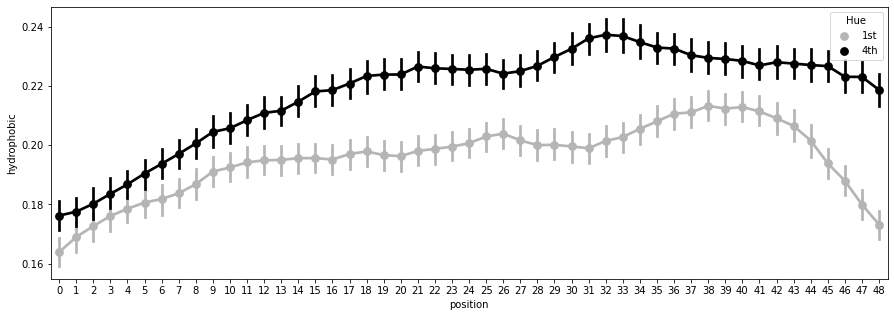

In [50]:
#Figure 2A
plt.figure(figsize=(15,5))
sns.pointplot(data=pd.concat([df_position1,df_position4]), x="position", y="hydrophobic",hue='Hue')
#plt.savefig('Figures/Confidence_hydrophobic_5.pdf')

<AxesSubplot:xlabel='position', ylabel='acidic'>

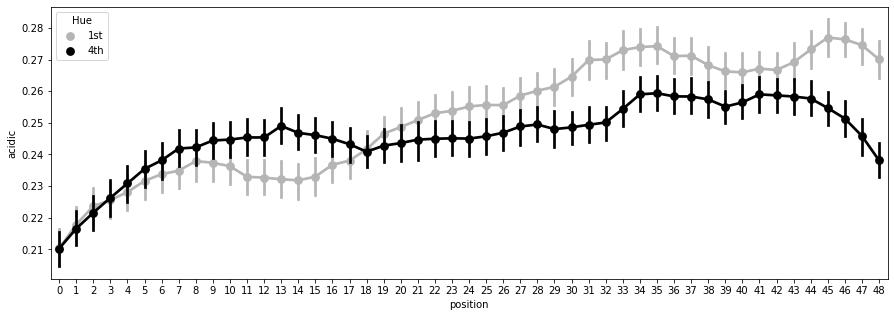

In [51]:
#Figure 2B
plt.figure(figsize=(15,5))
sns.pointplot(data=pd.concat([df_position1,df_position4]), x="position", y="acidic",hue='Hue')
#plt.savefig('Figures/Confidence_acidic_window5.pdf')

In [ ]:
colors=['#B5B5B5','#7A7A7A','#404040','#000000']
sns.set_palette(sns.color_palette(colors))


<AxesSubplot:xlabel='position', ylabel='hydrophobic'>

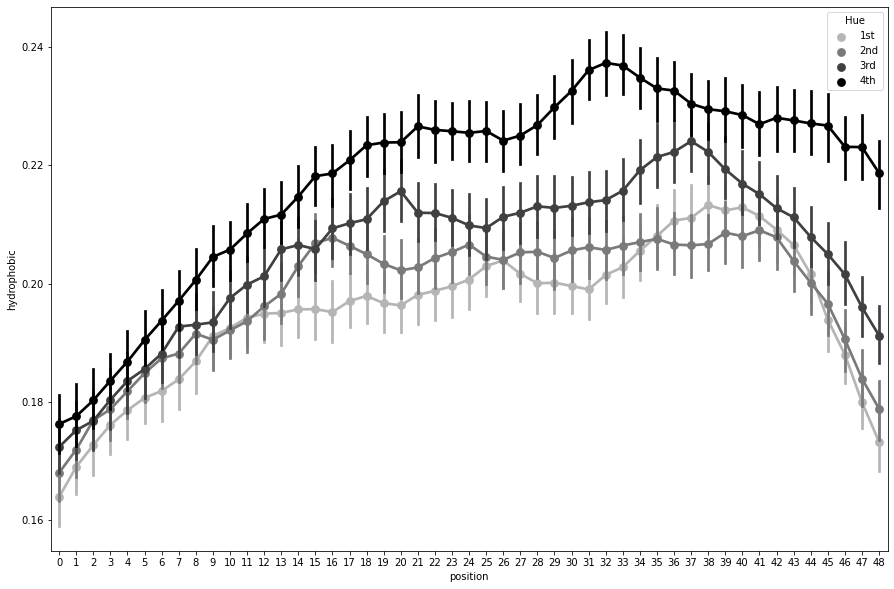

In [39]:
# Supplementary Figure 7A
plt.figure(figsize=(15,10))
sns.pointplot(data=pd.concat([df_position1,df_position2,df_position3,df_position4]), x="position", y="hydrophobic",hue='Hue')
#plt.savefig('Figures/Confidence_hydrophobic_all.pdf')

<AxesSubplot:xlabel='position', ylabel='acidic'>

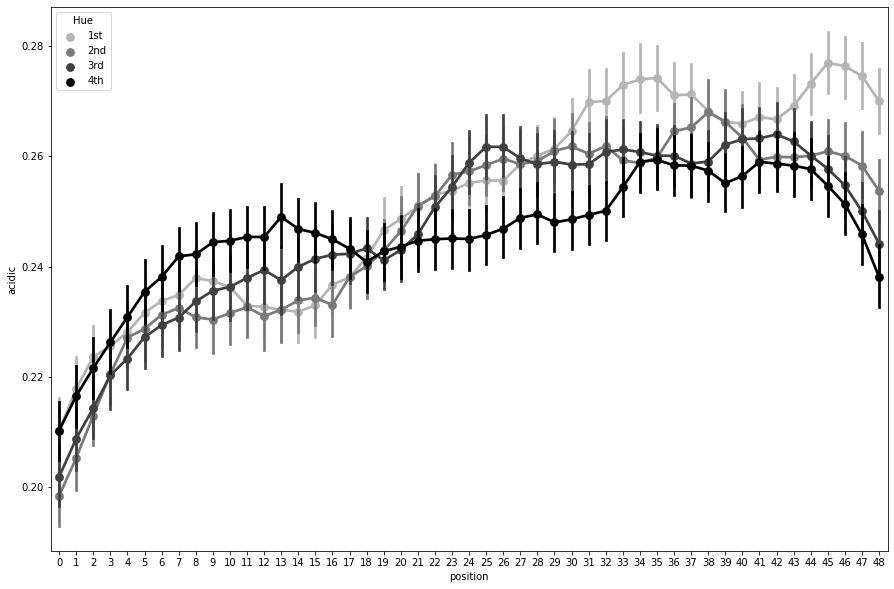

In [40]:
# Supplementary Figure 7B
plt.figure(figsize=(15,10))
sns.pointplot(data=pd.concat([df_position1,df_position2,df_position3,df_position4]), x="position", y="acidic",hue='Hue')
#plt.savefig('Figures/Confidence_acidic_all.pdf')

# Supplementary Figure 5

In [53]:

import pandas as pd

# Create a list to store dictionaries containing amino acid frequencies
amino_acid_frequencies = []

# List of amino acids
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

# Iterate through each row in the DataFrame
for index, row in data.iterrows():
    sequence = row['protein']
    locus_id = row['Locus']
    
    # Initialize a dictionary to store amino acid frequencies for this row
    amino_acid_count = {aa: 0 for aa in amino_acids}
    
    # Count the occurrence of each amino acid in the sequence
    for aa in sequence:
        if aa in amino_acid_count:
            amino_acid_count[aa] += 1
    
    # Calculate frequencies
    total_aa_count = len(sequence)
    amino_acid_freq = {aa: count / total_aa_count for aa, count in amino_acid_count.items()}
    
    # Add the locus ID and amino acid frequencies to the list
    amino_acid_frequencies.append({'Locus-ID': locus_id, **amino_acid_freq})

# Create a new DataFrame from the list of dictionaries
frequency_df = pd.DataFrame(amino_acid_frequencies)




In [60]:
#Transpose dataframe for plotting
aminos = list(frequency_df.columns)[1:]
change = []
for x in frequency_df.iterrows():

    count=0
    for z in x[1][1:]:
        change.append([z,aminos[count]])
        count+=1
df_plot1 = pd.DataFrame(change,columns=['Frequency','Amino'])

In [67]:
#Generate sub dataframes and add hue
df1_per = df_plot1[:20*4388]
df2_per =df_plot1[20*4388:20*2*4388]
df3_per =df_plot1[20*2*4388:20*3*4388]
df4_per =df_plot1[20*3*4388:]
df1_per['Hue'] = '1st_q'
df2_per['Hue'] = '2nd_q'
df3_per['Hue'] = '3rd_q'
df4_per['Hue'] = '4th_q'

/Users/NFHummel/opt/miniconda3/envs/paddle/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/NFHummel/opt/miniconda3/envs/paddle/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/NFHummel/opt/miniconda3/envs/paddle/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [68]:
df_plot2 = pd.concat([df1_per,df2_per,df3_per,df4_per])

In [69]:
#Define colors
colors=['#B5B5B5','#7A7A7A','#404040','#000000']
sns.set_palette(sns.color_palette(colors))


<AxesSubplot:xlabel='Amino', ylabel='Frequency'>

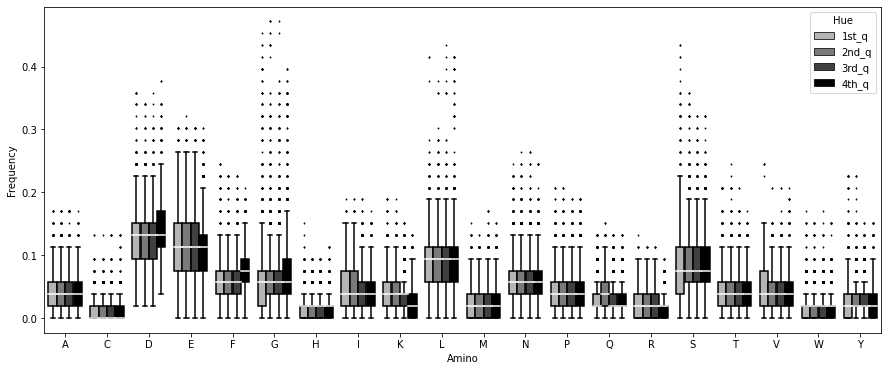

In [70]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df_plot2, x=df_plot2['Amino'],y=df_plot2['Frequency'],hue=df_plot2['Hue'],fliersize=1,dodge=True,medianprops={"color": "white"})
#plt.savefig('Figures/Amino_acid_composition_quartiles.pdf')

# Supplementary Figure 9

In [28]:
# calculate density of every amino acid at every position based on sliding window size
def position_matrix_extended(df4,window):
    frames=[]
    for y in df4.iterrows():
        info = []
        #Get protein sequence
        my_seq = y[1].protein
         # Generate dictionary for amino acid counts for every window sized frame of every tile
        for x in range(0,53):
            threshold = 53-window
            seq = my_seq[x:x+window]
            dictio = Prot(seq).count_amino_acids()
            info.append([x,
                         sum([dictio.get('A')])/window,
                         sum([dictio.get('C')])/window,
                         sum([dictio.get('D')])/window,
                         sum([dictio.get('E')])/window,
                         sum([dictio.get('F')])/window,
                         sum([dictio.get('G')])/window,
                         sum([dictio.get('H')])/window,
                         sum([dictio.get('I')])/window,
                         sum([dictio.get('K')])/window,
                         sum([dictio.get('L')])/window,
                         sum([dictio.get('M')])/window,
                         sum([dictio.get('N')])/window,
                         sum([dictio.get('P')])/window,
                         sum([dictio.get('Q')])/window,
                         sum([dictio.get('R')])/window,
                         sum([dictio.get('S')])/window,
                         sum([dictio.get('T')])/window,
                         sum([dictio.get('V')])/window,
                         sum([dictio.get('W')])/window,
                         sum([dictio.get('Y')])/window,
                         y[1].Hue])
            if x == threshold:
                break
        frames.append(pd.DataFrame(data=info,columns=['position','A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y','Hue']))
    #Concat all dataframes containing the frequencies of every amino acid for each window position and return
    return(pd.concat(frames))

In [29]:
dfex_position1 = position_matrix_extended(df1,5)
dfex_position2 = position_matrix_extended(df2,5)
dfex_position3 = position_matrix_extended(df3,5)
dfex_position4 = position_matrix_extended(df4,5)


In [30]:
df = pd.concat([dfex_position1,dfex_position2,dfex_position3,dfex_position4])

In [32]:
# Make custom color map
colors=['#B5B5B5','#7A7A7A','#404040','#000000']
sns.set_palette(sns.color_palette(colors))


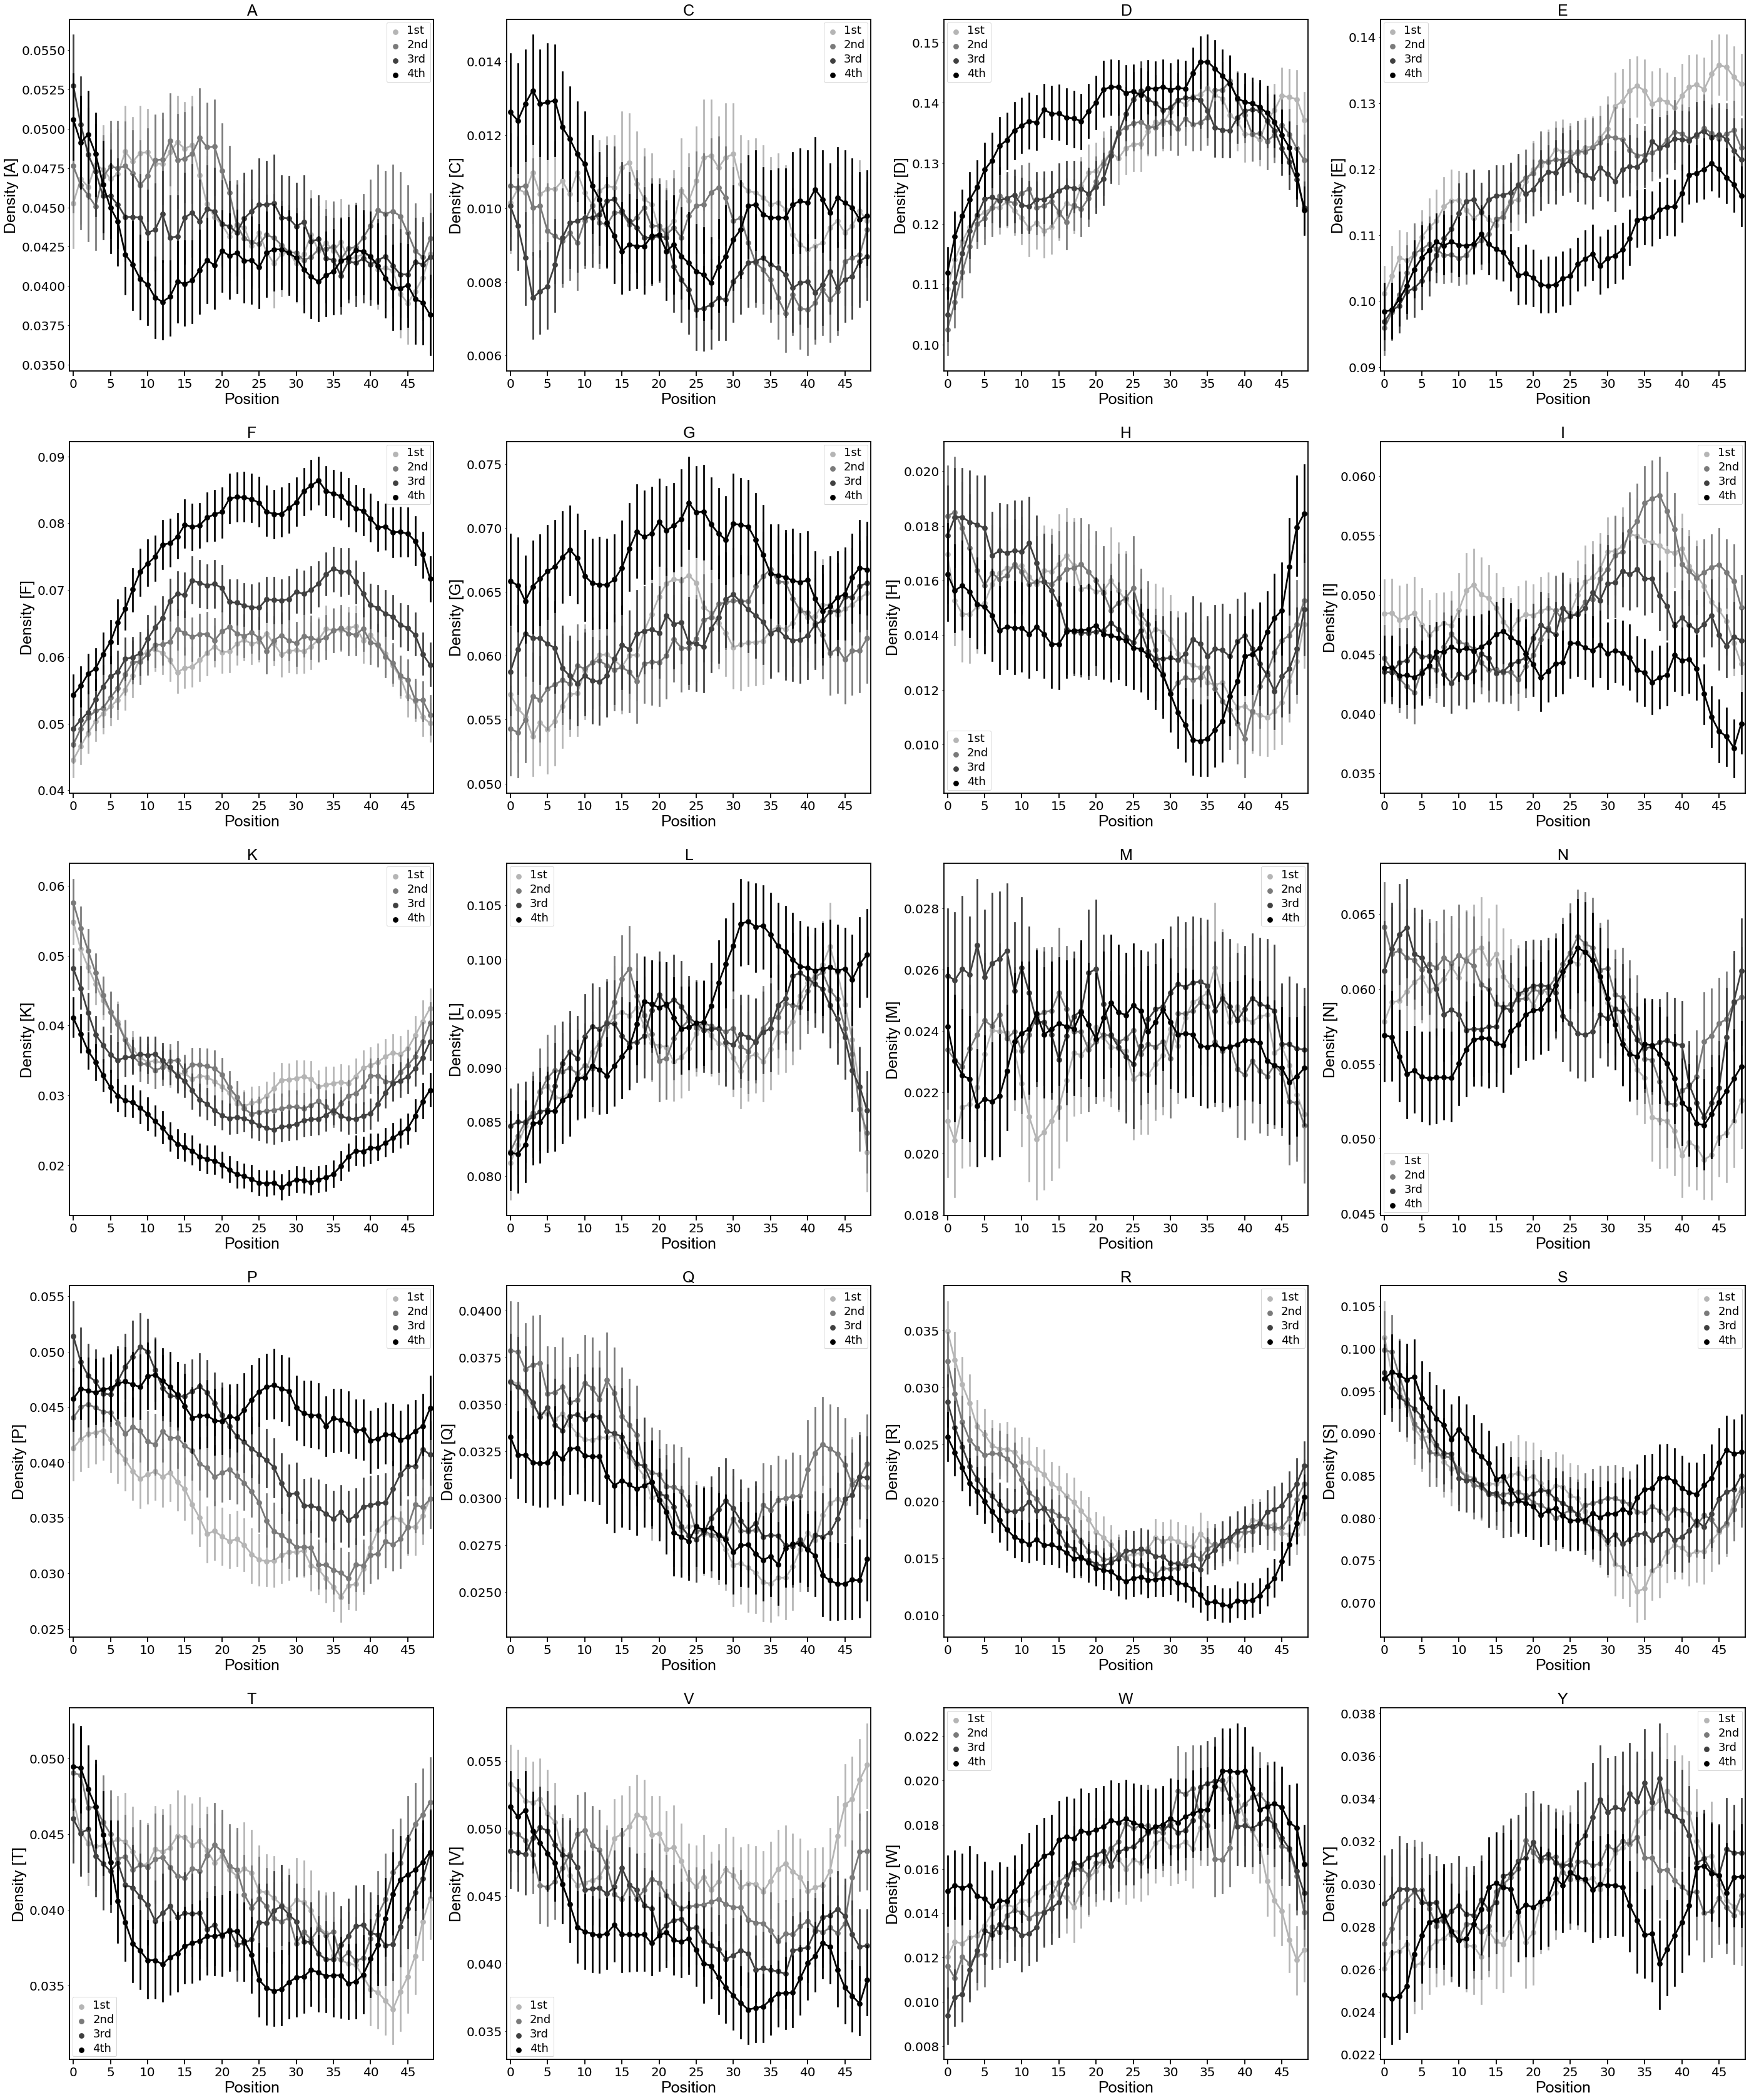

In [33]:
# Create a 5x4 grid of sub-plots
fig, axes = plt.subplots(5, 4, figsize=(48, 60))

# Flatten the axes array for easy indexing
axes = axes.flatten()
axis_linewidth = 1.8    
count = 0
tick_length = 8
tick_width = 1.8
legend_fontsize = 18
for i, column in enumerate(df):
    #print(i,count)
    if column in ['Hue','position']:
        continue
    sns.pointplot(x='position', y=column, data=df, ax=axes[count],hue='Hue')
    axes[count].set_title(column,fontsize = 25,fontname = 'Arial')
    axes[count].set_xlabel('Position',fontsize=25,fontname = 'Arial')
    axes[count].set_ylabel('Density ['+column+']',fontsize=25,fontname = 'Arial')
    axes[count].tick_params(axis='both', which='major', labelsize=20)
    x_ticks = axes[count].get_xticks()
    x_ticks_labeled = x_ticks[::5]  # Every 5th tick
    x_ticklabels = [str(int(x)) for x in x_ticks_labeled]  # Convert to string
    axes[count].set_xticks(x_ticks_labeled)
    axes[count].set_xticklabels(x_ticklabels, rotation=0)
    # Set axis linewidth
    for spine in axes[count].spines.values():
        spine.set_linewidth(axis_linewidth)
    # Increase tick length
    axes[count].tick_params(axis='x', which='major', length=tick_length,width=tick_width)
    
    legend = axes[count].legend()
    for text in legend.get_texts():
        text.set_fontsize(legend_fontsize)
    count+=1
#plt.savefig('Figures/All_aa_density.png')